## 1. Load Required Libraries

In [11]:
import src.util as utils

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import tree

from sklearn.metrics import r2_score, mean_absolute_error

## 2. Load Configuration File

In [3]:
config = utils.load_config()

## 3. Load Train and Valid Set

In [4]:
def load_train_feng(params: dict) -> pd.DataFrame:
    # Load train set
    x_train = utils.pickle_load(params["train_clean_path"][0])
    y_train = utils.pickle_load(params["train_clean_path"][1])

    return x_train, y_train

def load_valid(params: dict) -> pd.DataFrame:
    # Load valid set
    x_valid = utils.pickle_load(params["valid_clean_path"][0])
    y_valid = utils.pickle_load(params["valid_clean_path"][1])

    return x_valid, y_valid

def load_test(params: dict) -> pd.DataFrame:
    # Load tets set
    x_test = utils.pickle_load(params["test_clean_path"][0])
    y_test = utils.pickle_load(params["test_clean_path"][1])

    return x_test, y_test

In [5]:
x_train, y_train = load_train_feng(config)
x_valid, y_valid = load_valid(config)
x_test, y_test = load_test(config)

## 4. Training Model

1. Linear Regressiom

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(x_train, y_train)

LinearRegression()

2. KNeighborsRegressor

In [40]:
knn = KNeighborsRegressor()

In [41]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

3. XGBRegressor

In [42]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

C:\Users\nahar\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## 5. Evaluation and Metrics

1. Linear Regressiom

In [43]:
y_pred = lr.predict(x_valid)

In [44]:
print(mean_absolute_error(y_valid, y_pred))

13707.04422894029


In [45]:
y_pred = lr.predict(x_test)

In [46]:
print(mean_absolute_error(y_test, y_pred))

12316.040857575828


In [47]:
r2_score(y_test,y_pred)

0.7392249331285266

3. XGBRegressor

In [53]:
y_pred = xgb.predict(x_valid)

C:\Users\nahar\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [54]:
print(mean_absolute_error(y_valid, y_pred))

10910.62199665064


In [55]:
y_pred = xgb.predict(x_test)

C:\Users\nahar\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [56]:
print(mean_absolute_error(y_test, y_pred))

11144.067390274233


In [57]:
r2_score(y_test,y_pred)

0.6917616695710119

## 6. Dump Model Object

In [59]:
utils.pickle_dump(lr, config["production_model_path"])

In [60]:
model = utils.pickle_load("models/production_model.pkl")

In [61]:
y_pred = model.predict(x_valid)

In [62]:
y_pred

array([108728.78034126,  73898.38443717,  71232.61747831,  39031.05136692,
        94912.64358804,  35117.66214071, 119853.11112299,  69086.95570517,
        65716.15504218,  25095.6104911 ,  51490.92283567,  76737.84397093,
        68289.13159327,  80268.44633126,  49656.65427214, 115176.93018944,
        53430.40269271, 163817.38978216,  89869.62490988, 103353.58656826,
        56757.78847876,  96657.16450731,  36823.59404333,  20691.0599068 ,
        30932.0182932 ,  77659.76186828,  91888.82635296,  73743.08742044,
        14317.74996046,  31149.64983084, 240473.94627546,  65974.65362511,
        67673.05422765,  96657.16450731,  73816.92199848, 108728.78034126,
        71697.89990169,  55245.66210034,  19048.83795486, 131292.22434837,
        57901.72735196,  50115.26818414,  87180.29784123,  34941.93548353,
       124438.74532507,  61011.38108712,  71847.16407984,  34758.88038047,
        51183.89746839,  31742.90907152,  41054.76498415,  87188.04726036,
        26375.74649252,  

In [63]:
valid_set = pd.concat([x_valid, y_valid], axis = 1)

In [64]:
valid_set["pred"] = y_pred

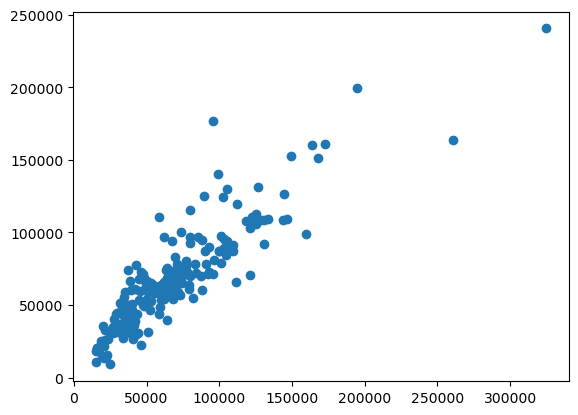

In [67]:
plt.scatter(data = valid_set, x = "Price", y = "pred")